0                          panArctic
6                 East Greenland Sea
7                        Barents Sea
14                    Central Arctic
15                      Barents-Kara
16                       Kara-Laptev
17    East-Siberian-Beaufort-Chukchi
Name: 0, dtype: object
/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/ecmwfsipn/reforecast/RAW_SIC_delta_5day_change_ecmwfsipn_ALL_ENS_Kara-Laptev_JJAS.csv
0.002150351146571722


(-0.51, 0.51)

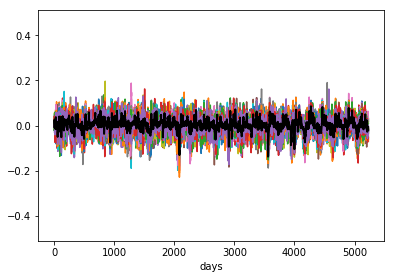

In [284]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import xarray as xr
import os
import pandas as pd
import glob 

model_name = 'ecmwfsipn'
model_type = 'reforecast'
select_ind = [0,6,7,14,15,16,17]
region_names = pd.read_csv('/home/disk/sipn/mcmcgraw/python/NSIDC_region_names.txt')
region_select = region_names.iloc[select_ind,1]
print(region_select)
filepath = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/{model_name}/{model_type}/'.format(model_name=model_name,model_type=model_type)
filenames = glob.glob(filepath+'RAW*.csv')

#for ifile in np.arange(0,len(filenames)):
ifile = 1
print(filenames[ifile])
i_file = filenames[ifile]
i_data = pd.read_csv(i_file)
no_time = len(np.transpose(i_data))
i_data = i_data.iloc[:,26:no_time]
print(np.nanmean(np.nanmean(i_data)))
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(np.arange(0,len(np.transpose(i_data))),np.transpose(i_data))
m1 = ax1.plot(np.arange(0,len(np.transpose(i_data))),np.nanmean(i_data,axis=0),'k',linewidth=2)
ax1.set_xlabel('days')
ax1.set_ylim([-0.51,0.51])


25 5231
0.2282565044018384 0.1965403334474013 0.2282565044018384
[-0.23       -0.22061224 -0.21122449 -0.20183673 -0.19244898 -0.18306122
 -0.17367347 -0.16428571 -0.15489796 -0.1455102  -0.13612245 -0.12673469
 -0.11734694 -0.10795918 -0.09857143 -0.08918367 -0.07979592 -0.07040816
 -0.06102041 -0.05163265 -0.0422449  -0.03285714 -0.02346939 -0.01408163
 -0.00469388  0.00469388  0.01408163  0.02346939  0.03285714  0.0422449
  0.05163265  0.06102041  0.07040816  0.07979592  0.08918367  0.09857143
  0.10795918  0.11734694  0.12673469  0.13612245  0.1455102   0.15489796
  0.16428571  0.17367347  0.18306122  0.19244898  0.20183673  0.21122449
  0.22061224  0.23      ]


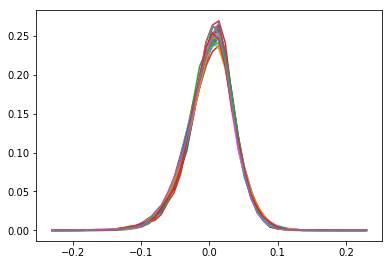

In [289]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
distrib = np.array([])
s1,s2 = i_data.shape
print(s1,s2)
fartt = abs(np.amin(np.amin(i_data,axis=1)))
fartt2 = abs(np.amax(np.amax(i_data,axis=1)))
print(fartt,fartt2,np.amax((fartt,fartt2)))

for iens in np.arange(0,25):
    #ax2.hist(np.transpose(i_data),bins=np.arange(-0.4,0.4,0.02),histtype=u'step',linewidth=2)
    test_den = stats.gaussian_kde(np.transpose(i_data.iloc[iens,:]))
    #print(test_den.dtype)
    ind = np.linspace(-0.23,0.23,50)
    fart = test_den.evaluate(ind)
    if iens == 0:
        distrib = fart
    else:
        distrib = np.vstack((distrib,fart))
    ax2.plot(ind,fart/len(ind))
    #ax2.set_xlabel('change in SIC')
print(ind)

/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS/NSIDC_SIE_delta_5day_change_Kara-Laptev_JJAS_NO_dt.txt
50
[-0.23       -0.22061224 -0.21122449 -0.20183673 -0.19244898 -0.18306122
 -0.17367347 -0.16428571 -0.15489796 -0.1455102  -0.13612245 -0.12673469
 -0.11734694 -0.10795918 -0.09857143 -0.08918367 -0.07979592 -0.07040816
 -0.06102041 -0.05163265 -0.0422449  -0.03285714 -0.02346939 -0.01408163
 -0.00469388  0.00469388  0.01408163  0.02346939  0.03285714  0.0422449
  0.05163265  0.06102041  0.07040816  0.07979592  0.08918367  0.09857143
  0.10795918  0.11734694  0.12673469  0.13612245  0.1455102   0.15489796
  0.16428571  0.17367347  0.18306122  0.19244898  0.20183673  0.21122449
  0.22061224  0.23      ]


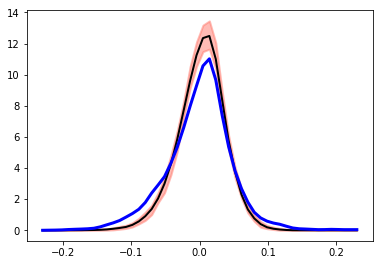

In [290]:
obs_fpath = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS'
fname_test = glob.glob(obs_fpath+'/NSIDC_SIE_delta*_JJAS_NO_dt.txt')
print(fname_test[11])
obs_read = pd.read_csv(fname_test[11])
obs_read = pd.DataFrame(obs_read.replace([np.inf,-np.inf],np.nan))
obs_read.fillna(method='ffill')
obs_read.fillna(method='bfill')
obs_read = obs_read.iloc[:,0]
#print(obs_read)
obs_dist = stats.gaussian_kde(obs_read)
obs_eval = obs_dist.evaluate(ind)

print(len(fart))
print(ind)
fig3 = plt.figure()
ax3 = fig3.add_axes([0.1,0.1,0.8,0.8])
#ax3.plot(np.amin(distrib,axis=0)/len(fart))
#ax3.plot(np.nanmean(distrib,axis=0)/len(fart),'k')
#ax3.plot(np.amax(distrib,axis=0)/len(fart))
ax3.fill_between(ind,np.amin(distrib,axis=0),np.amax(distrib,axis=0),
                 linewidth=2,color='xkcd:salmon',alpha=0.5)
ax3.plot(ind,np.nanmean(distrib,axis=0),'k',linewidth=2)
ax3.plot(ind,obs_eval,'b',linewidth=3)
#np.amin(distrib,axis=0)

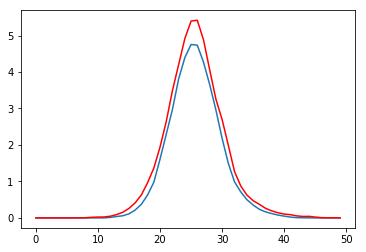

In [267]:
plt.plot(np.amin(distrib,axis=0))
plt.plot(np.amax(distrib,axis=0),'r')

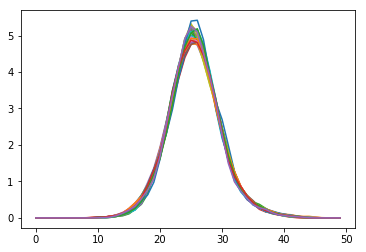

In [264]:
plt.plot(np.transpose(distrib))

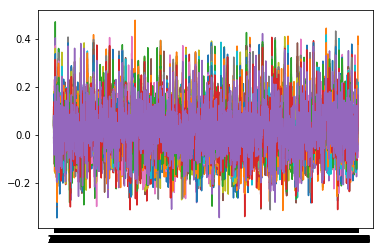

In [265]:
plt.plot(np.transpose(i_data))